In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
from multihist import Histdd 
%matplotlib inline

In [2]:
#load Ar data
filename='/depot/darkmatter/data/jupyterhub/Arghya/tpc_ar37_peaks_with_xyz_v3.hdf5'
df=pd.read_hdf(filename,'peaks')

In [3]:
that=[]
for this in df['width']:
    that.append(this[5])
df['width_50']=that

In [4]:
df_test=df[:len(df)//2]
df=df[len(df)//2:]

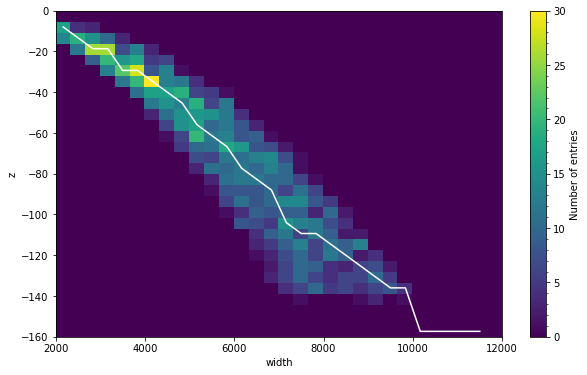

In [6]:
from scipy.stats import norm
from scipy.signal import savgol_filter
plt.figure(figsize=(10,6))
m2 = Histdd(bins=30, range=[[2e3, 12e3], [-160, 0]], axis_names=['width', 'z'])
m2.add(df['width_50'], df['z'])
median = m2.percentile(50, 'z')
m2.plot()

w_raw,z_raw=median.bin_centers[:-1],median.histogram[:-1]
plt.plot(w_raw,z_raw, color='white')
# w,z=smooth(w_raw,z_raw)
# plt.plot(w,z, color='white')

plt.show()

In [100]:
def do_df(df):
    df['z_pred']=np.interp(df['width_50'], w_raw, z_raw)
    df['dz']=df['z_pred']-df.z

In [101]:
do_df(df)

<ipython-input-100-5610c3d9b8cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_pred']=np.interp(df['width_50'], w_raw, z_raw)
<ipython-input-100-5610c3d9b8cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dz']=df['z_pred']-df.z


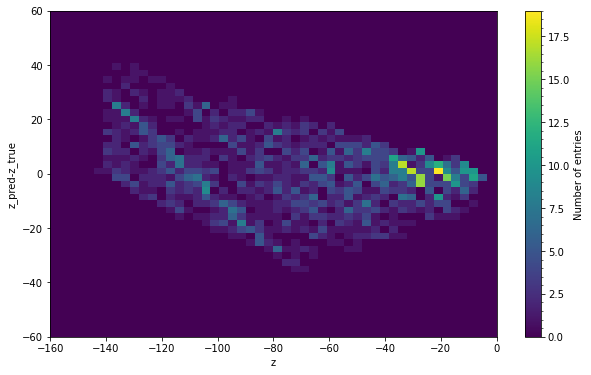

In [102]:
from scipy.stats import norm
from scipy.signal import savgol_filter
plt.figure(figsize=(10,6))
m2 = Histdd(bins=50, range=[[-160, 0], [-60, 60]], axis_names=['z', 'z_pred-z_true'])
m2.add(df['z'], df['z_pred']-df['z'])
m2.plot()

plt.show()

In [103]:
do_df(df_test)

<ipython-input-100-5610c3d9b8cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_pred']=np.interp(df['width_50'], w_raw, z_raw)
<ipython-input-100-5610c3d9b8cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dz']=df['z_pred']-df.z


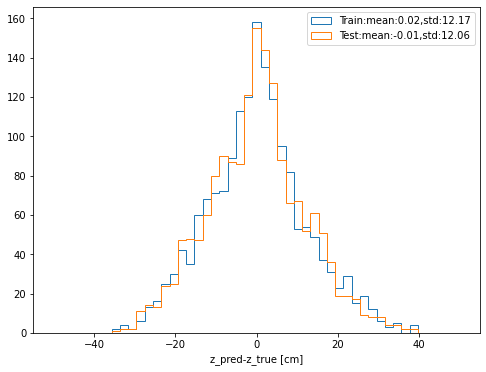

In [104]:
plt.figure(figsize=(8,6))
plt.hist(df.dz,bins=np.linspace(-50,50,50), label=f'Train:mean:{np.mean(df.dz):.2f},std:{np.std(df.dz):.2f}',histtype='step')
plt.hist(df_test.dz,bins=np.linspace(-50,50,50), label=f'Test:mean:{np.mean(df_test.dz):.2f},std:{np.std(df_test.dz):.2f}',histtype='step')
plt.legend()
plt.xlabel('z_pred-z_true [cm]')
plt.show()


(array([118., 141., 161., 161., 172., 181., 187., 201., 215., 160.]),
 array([-140.81229 , -127.34065 , -113.86901 , -100.39738 ,  -86.92574 ,
         -73.45411 ,  -59.982468,  -46.510834,  -33.039196,  -19.56756 ,
          -6.095925], dtype=float32),
 <a list of 10 Patch objects>)

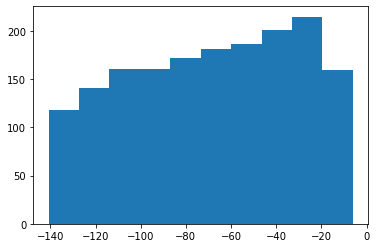

In [105]:
plt.hist(df.z)